# Importing libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Feed Forward NN

## Loading Dataset

In [260]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [261]:
df = pd.DataFrame(cancer["data"], columns = cancer["feature_names"])

In [262]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [272]:
# checking for nan values
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [273]:
# checking datatypes
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

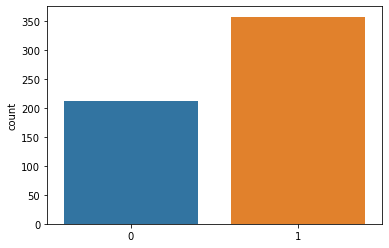

In [322]:
sns.countplot(cancer["target"])

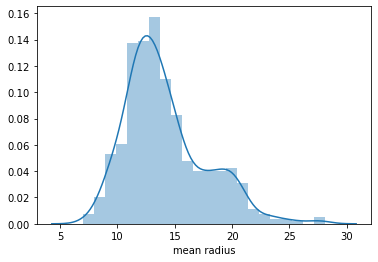

In [356]:
sns.distplot(df["mean radius"])

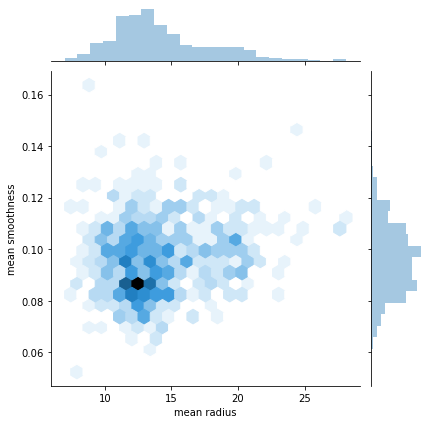

In [359]:
sns.jointplot("mean radius","mean smoothness",df,kind="hex")

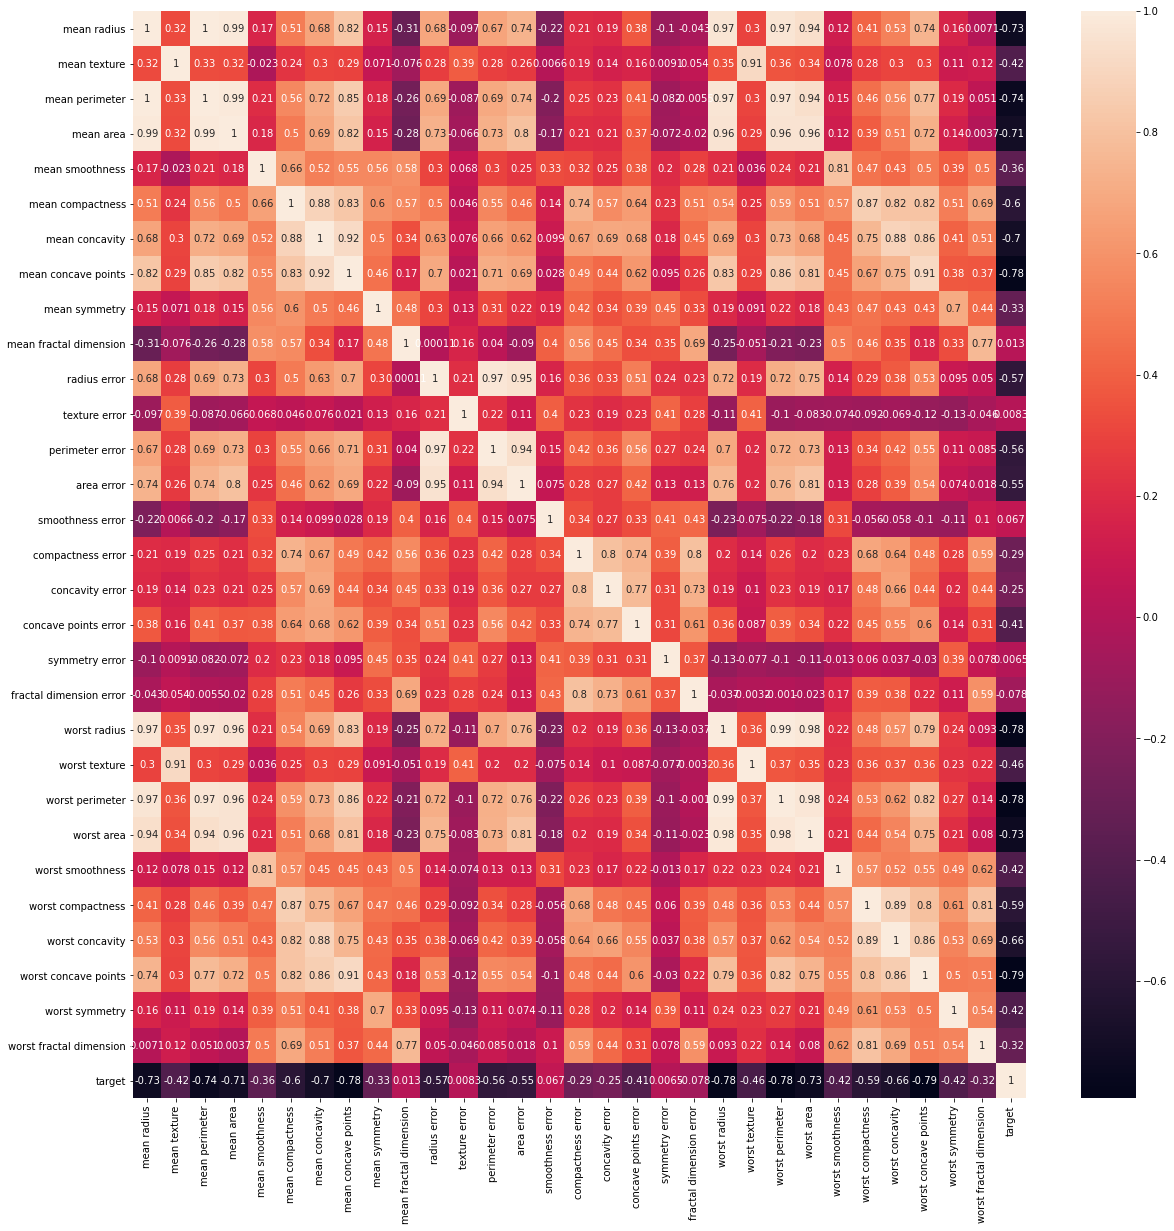

In [296]:
tempdf = pd.concat([df,pd.DataFrame(cancer["target"],columns = ["target"])],axis = 1)
plt.figure(figsize=(20,20))
sns.heatmap(tempdf.corr(),annot = True)

## Scaling the data

#### Different attributes here are spread across different ranges. To make it easir for our model to learn we need to scale all them to a similar range

In [263]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_transform = scaler.fit_transform(df)

In [264]:
x = df_transform
y = cancer["target"]

In [265]:
x.shape

(569, 30)

In [266]:
y.shape

(569,)

In [308]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

## Creating our Feed Forward Neural Network Model

In [309]:
model = Sequential()
model.add(Dense(32,activation = tf.nn.relu))
model.add(Dense(1,activation = tf.nn.sigmoid))

In [310]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1,
                          patience = 25)

In [311]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [312]:
model.fit(x_train,y_train,epochs=20,validation_split=0.2,callbacks = [early_stop])

Epoch 1/20
12/12 [==============================] - 1s 13ms/step - loss: 0.7593 - accuracy: 0.5246 - val_loss: 0.5521 - val_accuracy: 0.7582
Epoch 2/20
12/12 [==============================] - 0s 4ms/step - loss: 0.5254 - accuracy: 0.7993 - val_loss: 0.3969 - val_accuracy: 0.9011
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 0.3809 - accuracy: 0.9208 - val_loss: 0.3137 - val_accuracy: 0.9341
Epoch 4/20
12/12 [==============================] - 0s 5ms/step - loss: 0.3297 - accuracy: 0.9451 - val_loss: 0.2610 - val_accuracy: 0.9560
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 0.2588 - accuracy: 0.9704 - val_loss: 0.2253 - val_accuracy: 0.9670
Epoch 6/20
12/12 [==============================] - 0s 4ms/step - loss: 0.2293 - accuracy: 0.9639 - val_loss: 0.1988 - val_accuracy: 0.9670
Epoch 7/20
12/12 [==============================] - 0s 5ms/step - loss: 0.2085 - accuracy: 0.9593 - val_loss: 0.1780 - val_accuracy: 0.9670
Epoch 8/20
12/12 [=

In [313]:
model_loss = pd.DataFrame(model.history.history)

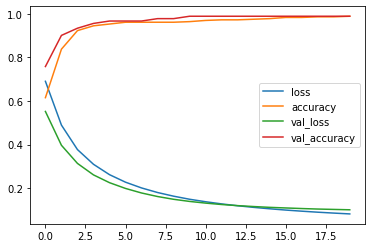

In [314]:
model_loss.plot()

In [320]:
y_pred = model.predict_classes(x_test)

In [321]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        39
           1       1.00      0.96      0.98        75

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



# Perceptron

# Creating an AND Gate using Perceptron

## Creating data of And gate

In [57]:
x = [[1,1],[1,0],[0,1],[0,0]]
y = [1,0,0,0]

In [58]:
x = np.array(x)
x.shape

(4, 2)

In [59]:
y = np.array(y)
y.shape

(4,)

## Building model

In [47]:
model1 = Sequential()
model1.add(Dense(1,activation=tf.nn.sigmoid))
model1.compile(optimizer="SGD",loss="binary_crossentropy",metrics=["accuracy"])

# training 

In [48]:
model1.fit(x,y,epochs = 2000) # so many epochs because of the so little data

Epoch 1/2000
1/1 [==============================] - 1s 869ms/step - loss: 0.7764 - accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7758 - accuracy: 0.5000
Epoch 3/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.7751 - accuracy: 0.5000
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7745 - accuracy: 0.5000
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7739 - accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.7732 - accuracy: 0.5000
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.7726 - accuracy: 0.5000
Epoch 8/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.7720 - accuracy: 0.5000
Epoch 9/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.7714 - accuracy: 0.5000
Epoch 10/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.7707 - accuracy: 0.5000
Epoch 11/2000
1/1

In [49]:
model_loss = pd.DataFrame(model1.history.history)

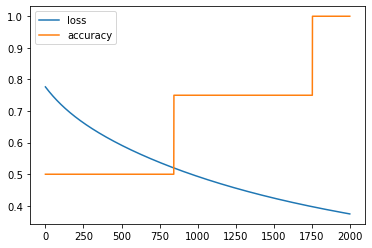

In [50]:
model_loss.plot()

## Testing the model created

In [53]:
model1.predict_classes([[1,1]])

array([[1]])

In [54]:
model1.predict_classes([[0,1]])

array([[0]])

In [55]:
model1.predict_classes([[1,0]])

array([[0]])

In [56]:
model1.predict_classes([[0,0]])

array([[0]])

## We can see that all the datapoints have been correctly classified